In [4]:
import pandas as pd

# Read the CSV files
df_full = pd.read_csv("results/full_baseline.csv")
df_far_50 = pd.read_csv("results/furthest_50_percent.csv")
df_random_50 = pd.read_csv("results/random_50_percent.csv")

# Add a column to each dataframe to indicate the dataset type
df_full['dataset_type'] = 'full dataset'
df_far_50['dataset_type'] = 'k-means furthest'
df_random_50['dataset_type'] = 'random'

df = pd.concat([df_full, df_far_50, df_random_50], ignore_index=True)

df.head(10)

,run_id,accuracy,time,pruning_method,dataset_size,selection_strategy,apply_pca,k,n_closest,n_furthest,num_epochs,batch_size,learning_rate,experiment_id,dataset_type
0,1,99.03,99.504955,none,60000,NaN,False,1,1,1,5,64,0.001,1,full dataset
1,2,98.71,101.902400,none,60000,NaN,False,1,1,1,5,64,0.001,1,full dataset
2,3,98.50,103.523540,none,60000,NaN,False,1,1,1,5,64,0.001,1,full dataset
3,4,98.88,92.619262,none,60000,NaN,False,1,1,1,5,64,0.001,1,full dataset
4,5,98.63,94.935168,none,60000,NaN,False,1,1,1,5,64,0.001,1,full dataset
5,1,98.81,45.104163,cluster,30000,furthest,True,50,1,1,5,64,0.001,1,k-means furthest
6,2,98.88,46.212341,cluster,30000,furthest,True,50,1,1,5,64,0.001,1,k-means furthest
7,3,98.69,46.643733,cluster,30000,furthest,True,50,1,1,5,64,0.001,1,k-means furthest
8,4,98.73,46.937390,cluster,30000,furthest,True,50,1,1,5,64,0.001,1,k-means furthest
9,5,98.11,47.406447,cluster,30000,furthest,True,50,1,1,5,64,0.001,1,k-means furthest


In [10]:
# Add a column for data size as a percentage of 60000
df_unified['dataset_percent'] = df_unified['dataset_size'] / 60000 * 100

# Compute the median accuracy, time, and data size for each dataset_type
median_results = df_unified.groupby(['dataset_type', 'dataset_percent'])[['accuracy', 'time']].median().reset_index()

# Display the median results
print(median_results)

       dataset_type  dataset_percent  accuracy       time
0      full dataset            100.0     98.71  99.504955
1  k-means furthest             50.0     98.73  46.643733
2            random             50.0     98.57  50.979645


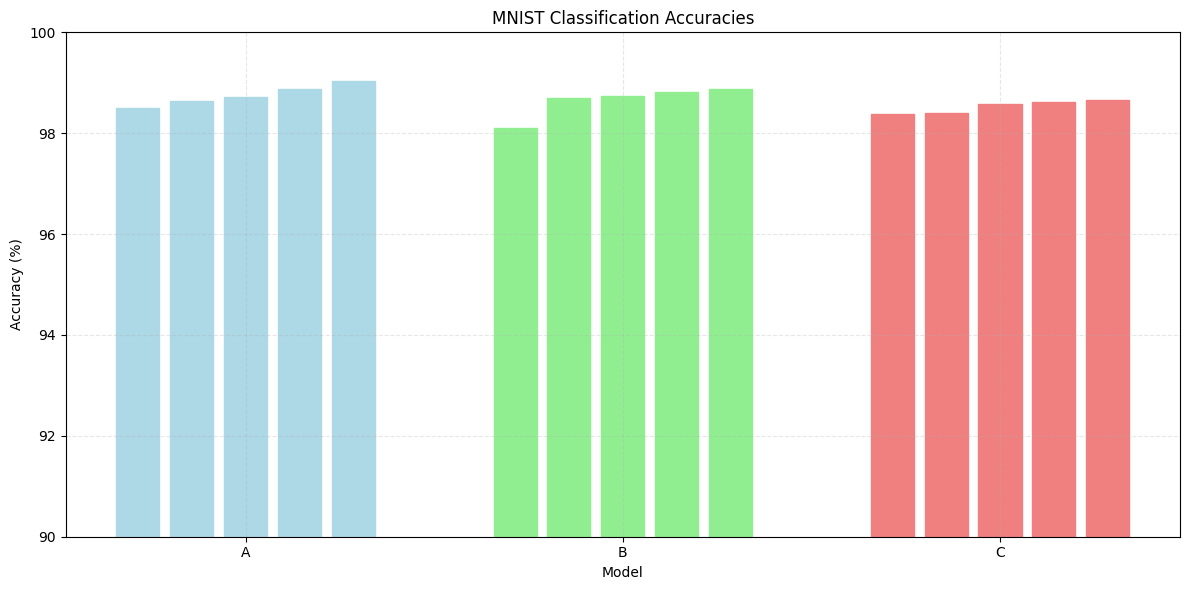

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort within each dataset type by accuracy
df_sorted = df.sort_values(['dataset_type', 'accuracy'])

plt.figure(figsize=(12, 6))

# Create position indices for bars with spacing between groups
unique_types = df_sorted['dataset_type'].unique()
n_groups = len(unique_types)
bar_positions = []
current_pos = 0

for dtype in unique_types:
   n_bars = len(df_sorted[df_sorted['dataset_type'] == dtype])
   positions = np.arange(current_pos, current_pos + n_bars)
   bar_positions.extend(positions)
   current_pos += n_bars + 2  # Add 2 for spacing between groups

# Create bar plot with computed positions
bars = plt.bar(bar_positions, df_sorted['accuracy'])

# Color bars by dataset type
colors = {'full dataset': 'lightblue', 'k-means furthest': 'lightgreen', 'random': 'lightcoral'}
for i, row in enumerate(df_sorted.itertuples()):
   bars[i].set_color(colors[row.dataset_type])

plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.title('MNIST Classification Accuracies')
plt.ylim(90, 100)
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-ticks at center of each group
group_centers = []
start = 0
for dtype in unique_types:
   n_bars = len(df_sorted[df_sorted['dataset_type'] == dtype])
   center = start + (n_bars - 1) / 2
   group_centers.append(center)
   start += n_bars + 2

custom_labels = ["A", "B", "C"]
plt.xticks(group_centers, custom_labels, rotation=0)


# Add legend
# legend_elements = [plt.Rectangle((0,0),1,1, color=color, label=label) 
#                  for label, color in colors.items()]
# plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

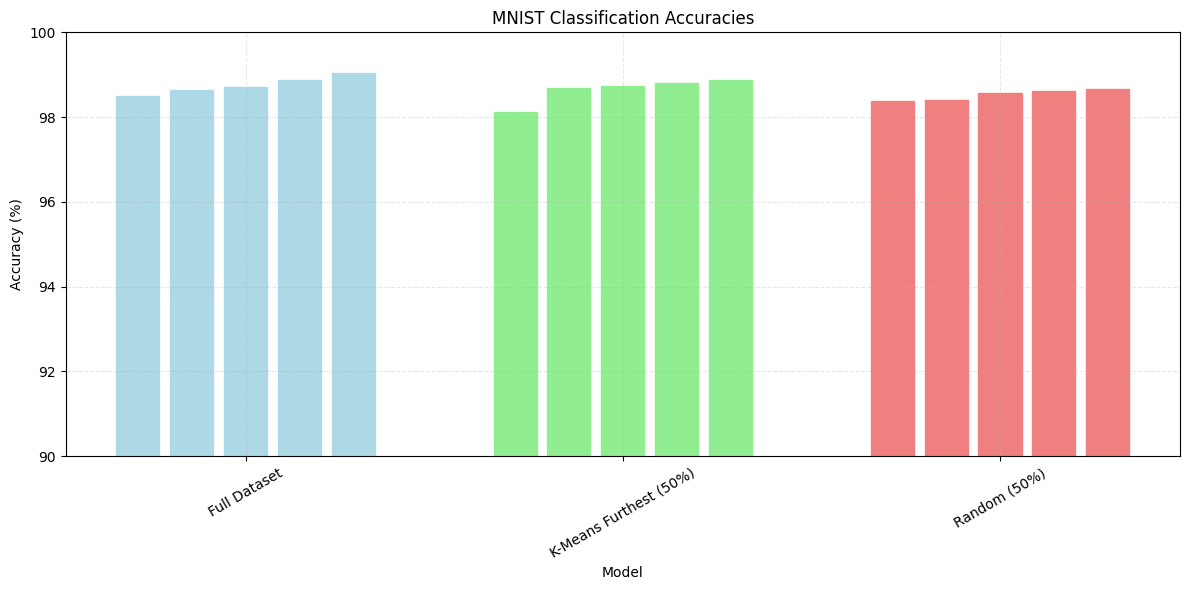

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort within each dataset type by accuracy
df_sorted = df.sort_values(['dataset_type', 'accuracy'])

plt.figure(figsize=(12, 6))

# Create position indices for bars with spacing between groups
unique_types = df_sorted['dataset_type'].unique()
n_groups = len(unique_types)
bar_positions = []
current_pos = 0

for dtype in unique_types:
   n_bars = len(df_sorted[df_sorted['dataset_type'] == dtype])
   positions = np.arange(current_pos, current_pos + n_bars)
   bar_positions.extend(positions)
   current_pos += n_bars + 2  # Add 2 for spacing between groups

# Create bar plot with computed positions
bars = plt.bar(bar_positions, df_sorted['accuracy'])

# Color bars by dataset type
colors = {'full dataset': 'lightblue', 'k-means furthest': 'lightgreen', 'random': 'lightcoral'}
for i, row in enumerate(df_sorted.itertuples()):
   bars[i].set_color(colors[row.dataset_type])

plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.title('MNIST Classification Accuracies')
plt.ylim(90, 100)
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-ticks at center of each group
group_centers = []
start = 0
for dtype in unique_types:
   n_bars = len(df_sorted[df_sorted['dataset_type'] == dtype])
   center = start + (n_bars - 1) / 2
   group_centers.append(center)
   start += n_bars + 2

custom_labels = ["Full Dataset", "K-Means Furthest (50%)", "Random (50%)"]
plt.xticks(group_centers, custom_labels, rotation=30)


# Add legend
# legend_elements = [plt.Rectangle((0,0),1,1, color=color, label=label) 
#                  for label, color in colors.items()]
# plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

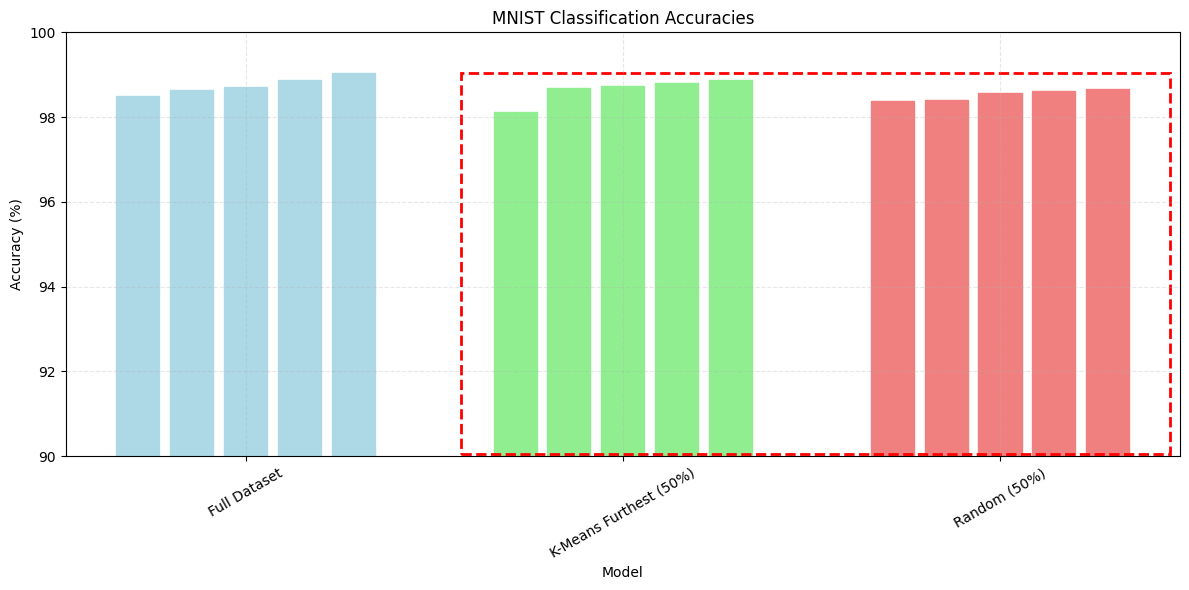

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches

# Sort within each dataset type by accuracy
df_sorted = df.sort_values(['dataset_type', 'accuracy'])

plt.figure(figsize=(12, 6))

# Create position indices for bars with spacing between groups
unique_types = df_sorted['dataset_type'].unique()
n_groups = len(unique_types)
bar_positions = []
current_pos = 0

for dtype in unique_types:
    n_bars = len(df_sorted[df_sorted['dataset_type'] == dtype])
    positions = np.arange(current_pos, current_pos + n_bars)
    bar_positions.extend(positions)
    current_pos += n_bars + 2  # Add 2 for spacing between groups

# Create bar plot with computed positions
bars = plt.bar(bar_positions, df_sorted['accuracy'])

# Color bars by dataset type
colors = {'full dataset': 'lightblue', 'k-means furthest': 'lightgreen', 'random': 'lightcoral'}
for i, row in enumerate(df_sorted.itertuples()):
    bars[i].set_color(colors[row.dataset_type])

plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.title('MNIST Classification Accuracies')
plt.ylim(90, 100)
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-ticks at center of each group
group_centers = []
start = 0
for dtype in unique_types:
    n_bars = len(df_sorted[df_sorted['dataset_type'] == dtype])
    center = start + (n_bars - 1) / 2
    group_centers.append(center)
    start += n_bars + 2

custom_labels = ["Full Dataset", "K-Means Furthest (50%)", "Random (50%)"]
plt.xticks(group_centers, custom_labels, rotation=30)

# Add a box around "K-Means Furthest (50%)" and "Random (50%)"
ax = plt.gca()
rect = patches.Rectangle((group_centers[1] - 3, 90.05), 1.88 * (group_centers[2] - group_centers[1]), 9,
                         linewidth=2, edgecolor='red', facecolor='none', linestyle='--')
ax.add_patch(rect)

plt.tight_layout()
plt.show()